In [ ]:
# ==============================
# 1. Importar librerías
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================
# 2. Cargar datos
# ==============================
df = pd.read_csv("C:/Users/AulaDigital/Desktop/materiales/Machine-Learning/caso1_semiconductores.csv")
df.head()




FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/AulaDigital/Desktop/materiales/Machine-Learning/caso2_fotoltaivos.csv'

In [10]:
print("Tamaño del dataset:", df.shape)
print("\nTipos de datos y valores nulos:")
display(df.info())
print("\nEstadísticas básicas:")
display(df.describe())

Tamaño del dataset: (10000, 93)

Tipos de datos y valores nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 93 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   material_id                10000 non-null  object 
 1   formula                    10000 non-null  object 
 2   band_gap                   10000 non-null  float64
 3   formation_energy_per_atom  10000 non-null  float64
 4   energy_above_hull          10000 non-null  float64
 5   density                    10000 non-null  float64
 6   nsites                     10000 non-null  int64  
 7   volume                     10000 non-null  float64
 8   crystal_system             10000 non-null  object 
 9   spacegroup_number          10000 non-null  int64  
 10  spacegroup_symbol          10000 non-null  object 
 11  volume_per_atom            10000 non-null  float64
 12  n_elements                 10000 non-n

None


Estadísticas básicas:


,band_gap,formation_energy_per_atom,energy_above_hull,density,nsites,volume,spacegroup_number,volume_per_atom,n_elements,avg_atomic_mass,...,frac_W,frac_Re,frac_Os,frac_Ir,frac_Pt,frac_Au,frac_Hg,frac_Tl,frac_Pb,frac_Bi
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,2.230931,-1.993585,0.134122,4.409136,38.943200,667.812197,67.530800,22.377035,3.666600,66.237300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.668985,1.163988,0.333907,1.833883,35.043635,721.520775,72.862165,48.092922,0.957359,33.511297,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.001000,-4.467987,0.000000,0.039581,1.000000,11.286588,1.000000,5.539658,1.000000,5.010061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.806400,-2.879389,0.000032,3.079931,16.000000,260.241345,12.000000,13.021788,3.000000,37.785385,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.985100,-2.233784,0.027286,4.330905,28.000000,493.417931,33.000000,15.281495,4.000000,65.100759,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,3.355350,-1.186606,0.126257,5.660812,50.000000,831.591464,127.000000,19.490302,4.000000,89.736122,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.065300,4.159950,5.082457,12.472296,344.000000,19406.766762,230.000000,1492.828212,9.000000,208.980400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# ==============================
# 4. Valores nulos y duplicados
# ==============================
umbral = 0.9
cols_casi_constantes = []

for col in df.columns:
    if not df[col].dropna().empty:  # solo analizar si tiene datos
        freq_max = df[col].value_counts(normalize=True).iloc[0]
        if freq_max > umbral:
            cols_casi_constantes.append(col)

print("Columnas casi constantes (>90% el mismo valor):", cols_casi_constantes)


# Eliminar esas columnas
df1 = df.drop(columns=cols_casi_constantes)



Columnas casi constantes (>90% el mismo valor): ['is_binary', 'has_metal', 'has_metalloid', 'has_nonmetal', 'n_metals', 'n_metalloids', 'n_nonmetals', 'frac_H', 'frac_Li', 'frac_C', 'frac_N', 'frac_O', 'frac_F', 'frac_Na', 'frac_Mg', 'frac_Al', 'frac_Si', 'frac_P', 'frac_S', 'frac_Cl', 'frac_K', 'frac_Ca', 'frac_Ti', 'frac_V', 'frac_Cr', 'frac_Mn', 'frac_Fe', 'frac_Co', 'frac_Ni', 'frac_Cu', 'frac_Zn', 'frac_Ga', 'frac_Ge', 'frac_As', 'frac_Se', 'frac_Br', 'frac_Sr', 'frac_Y', 'frac_Zr', 'frac_Nb', 'frac_Mo', 'frac_Ru', 'frac_Rh', 'frac_Pd', 'frac_Ag', 'frac_Cd', 'frac_In', 'frac_Sn', 'frac_Sb', 'frac_Te', 'frac_I', 'frac_Ba', 'frac_La', 'frac_Ce', 'frac_Hf', 'frac_Ta', 'frac_W', 'frac_Re', 'frac_Os', 'frac_Ir', 'frac_Pt', 'frac_Au', 'frac_Hg', 'frac_Tl', 'frac_Pb', 'frac_Bi']


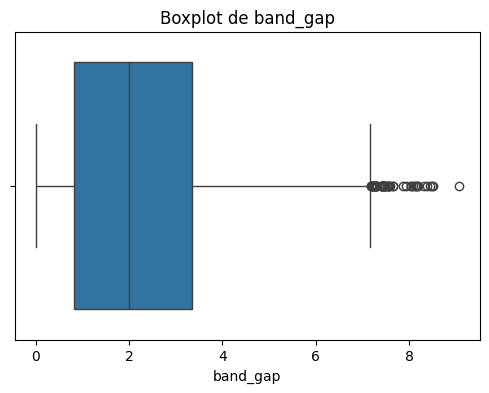

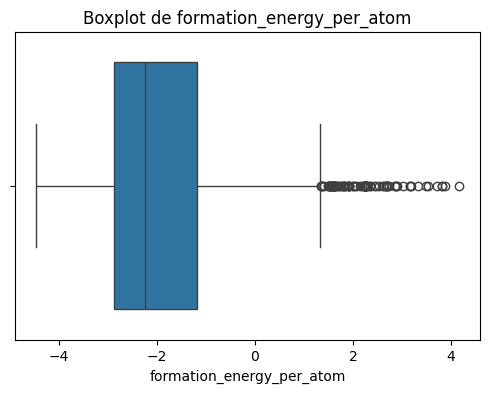

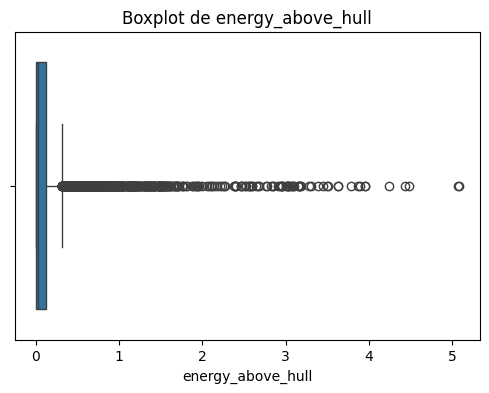

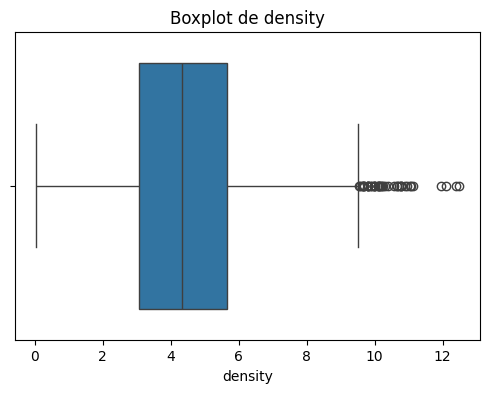

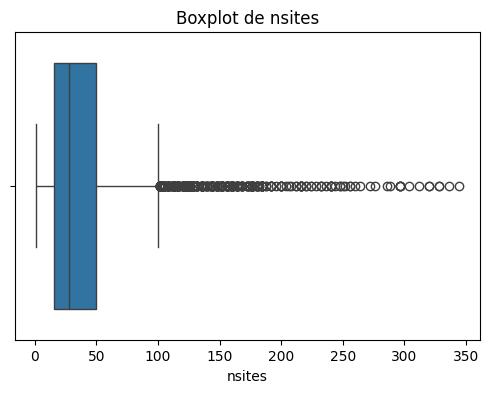

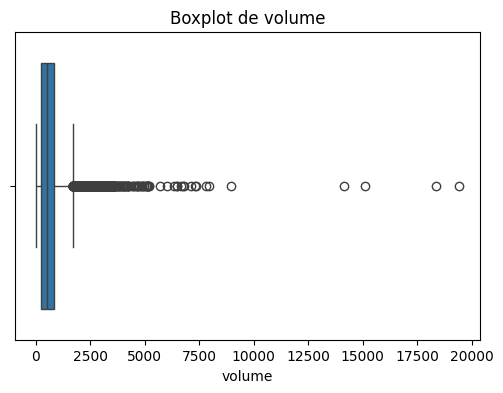

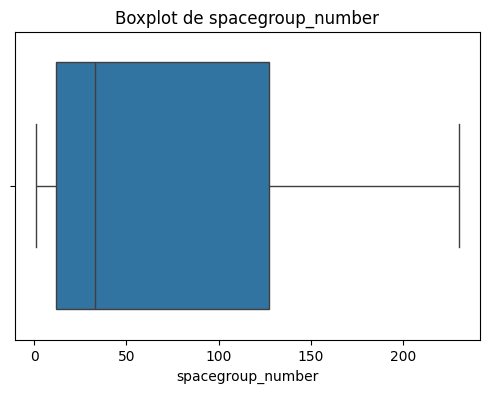

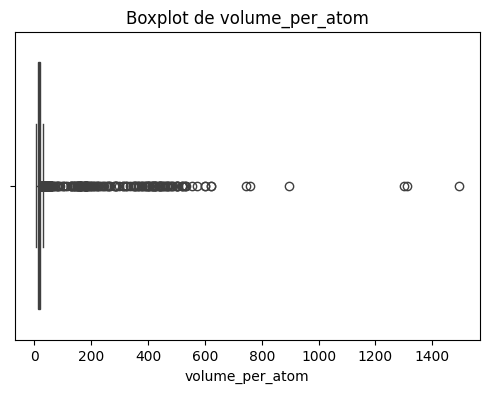

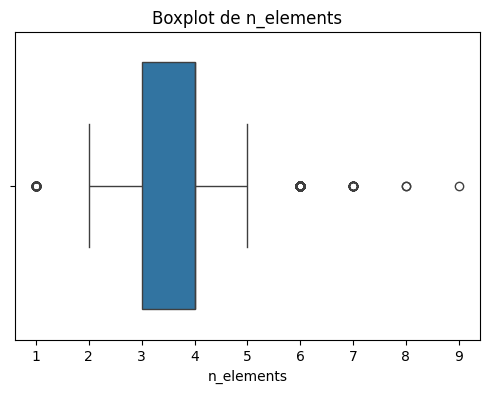

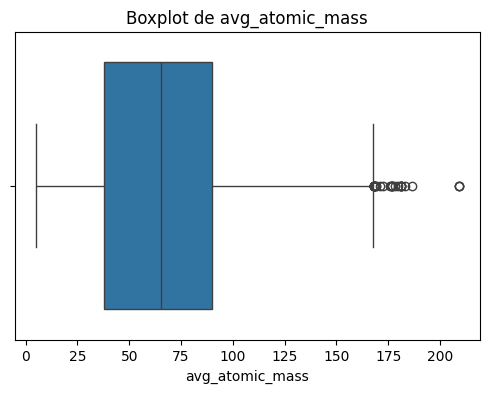

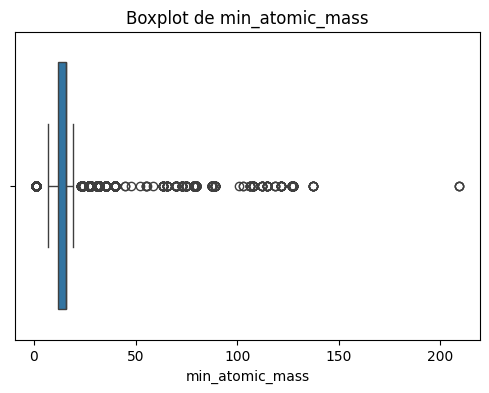

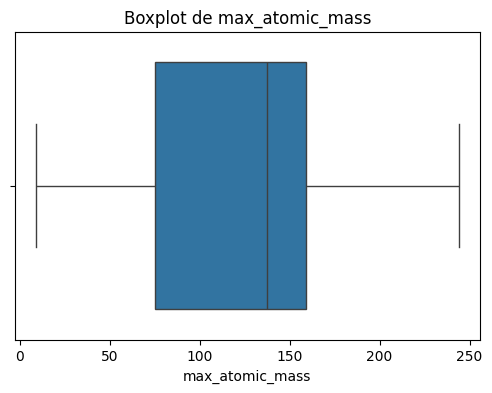

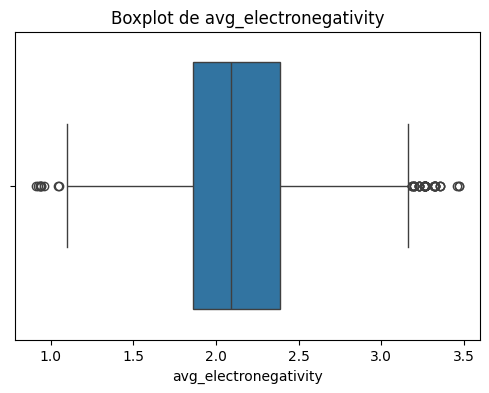

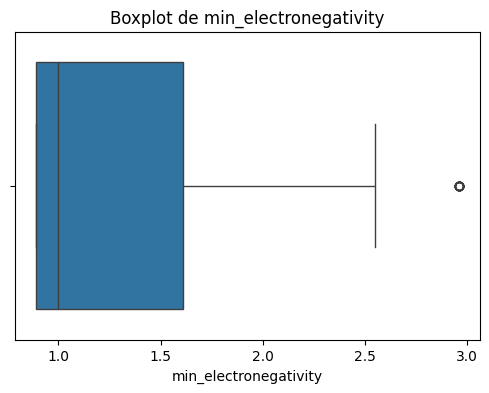

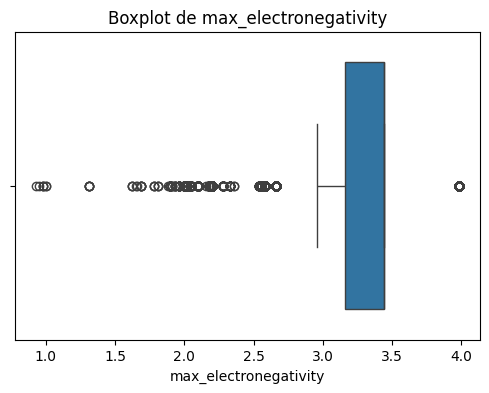

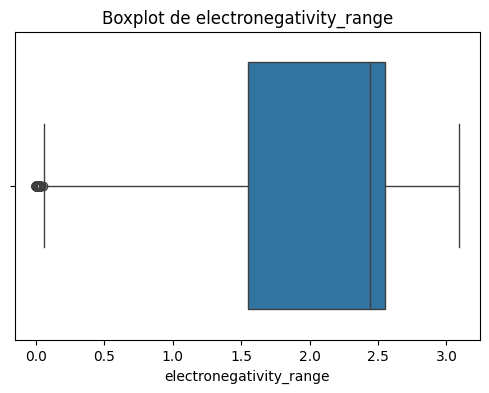

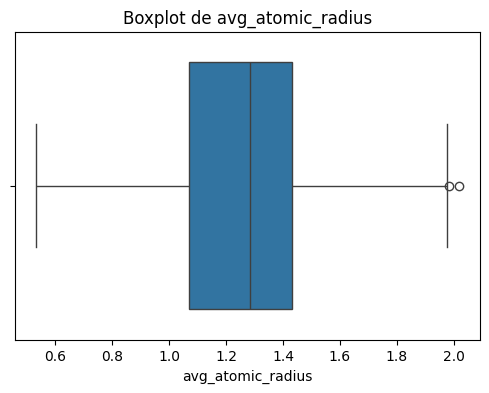

ValueError: List of boxplot statistics and `positions` values must have same the length

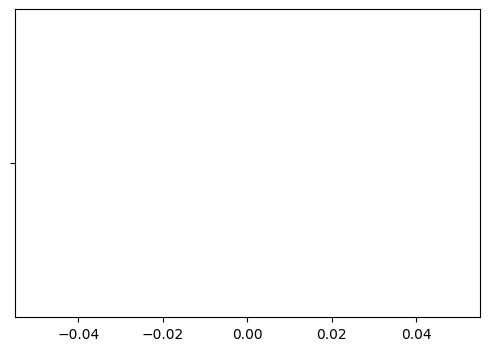

In [12]:
# ==============================
# 5. Análisis univariante
# ==============================

numeric_cols = df1.select_dtypes(include=np.number).columns.tolist()

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df1[col])
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)
    plt.show()

Columnas numéricas detectadas: ['band_gap', 'formation_energy_per_atom', 'energy_above_hull', 'density', 'nsites', 'volume', 'spacegroup_number', 'volume_per_atom', 'n_elements', 'avg_atomic_mass', 'min_atomic_mass', 'max_atomic_mass', 'avg_electronegativity', 'min_electronegativity', 'max_electronegativity', 'electronegativity_range', 'avg_atomic_radius', 'avg_ionic_radius']


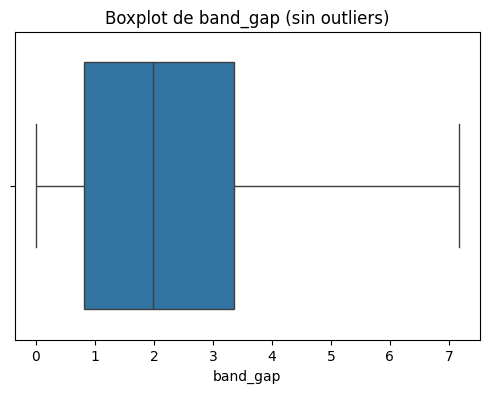

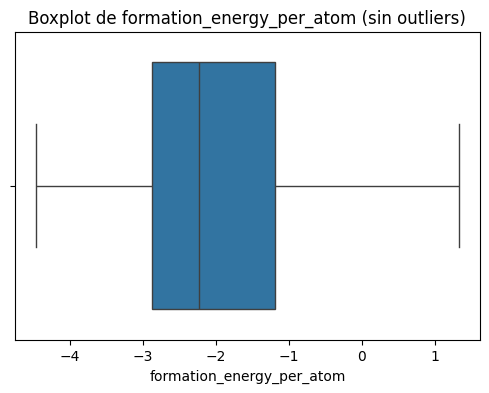

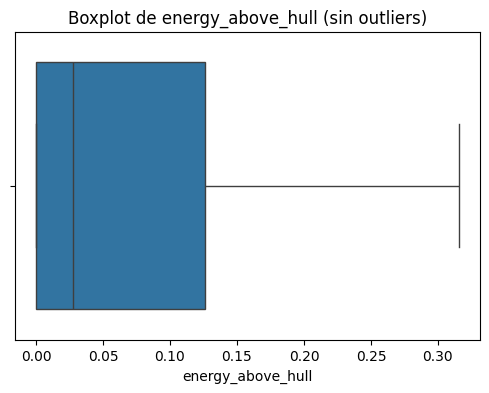

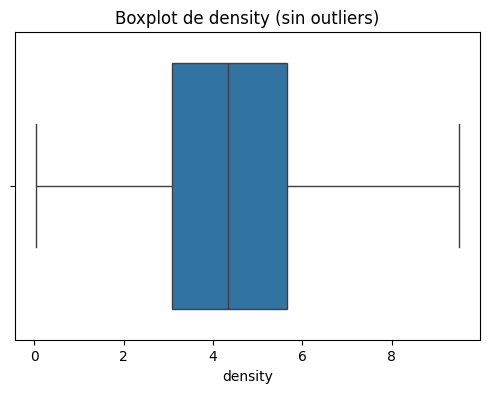

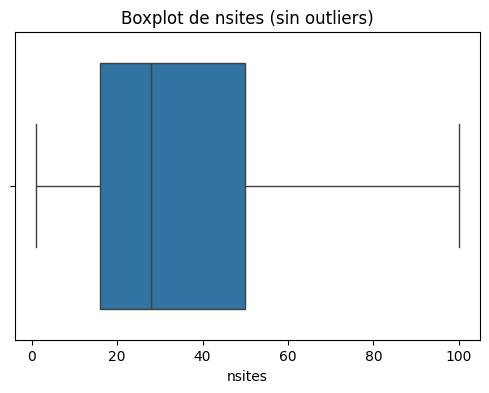

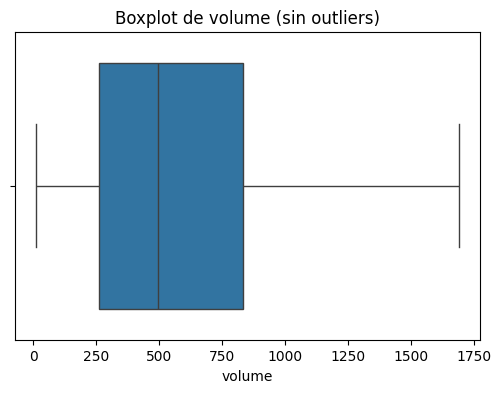

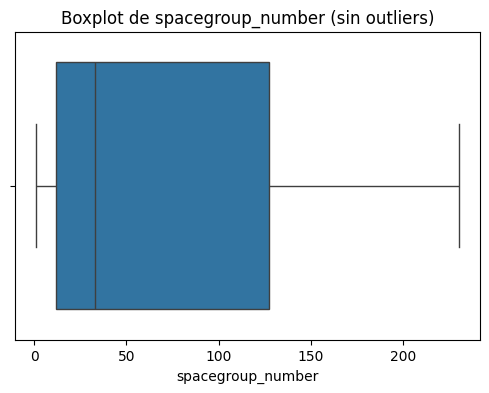

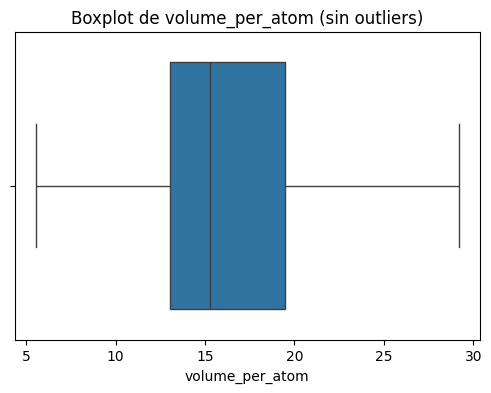

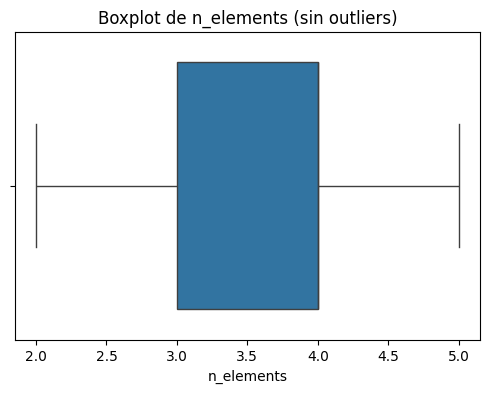

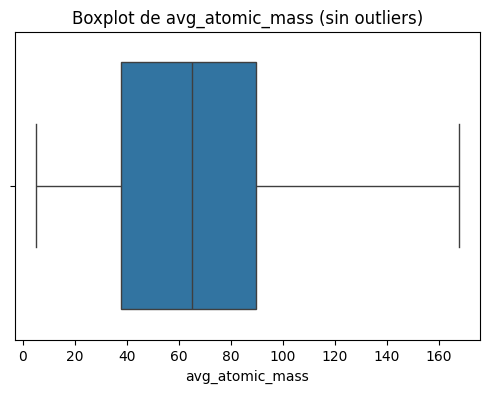

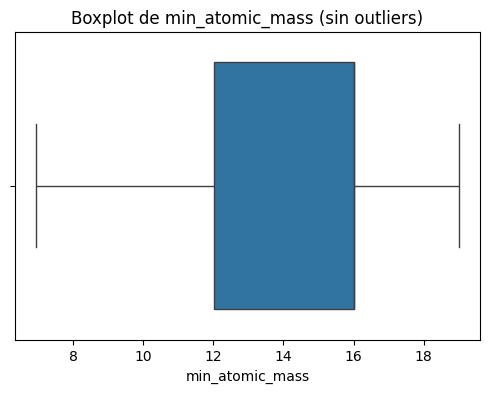

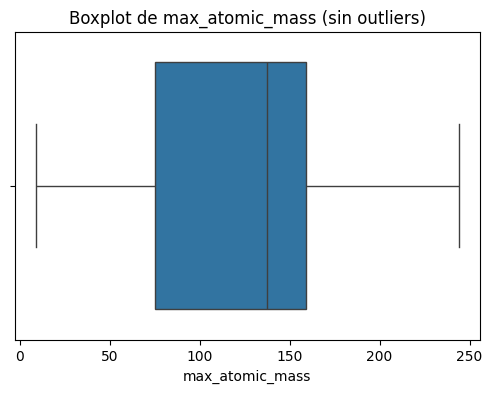

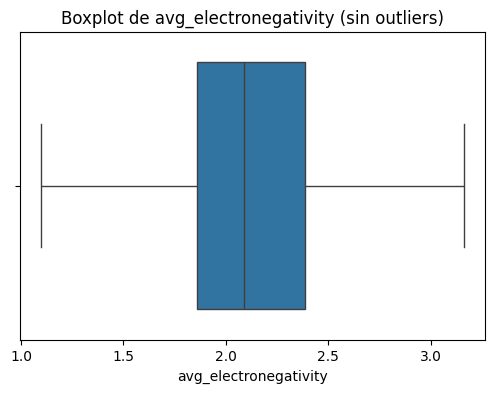

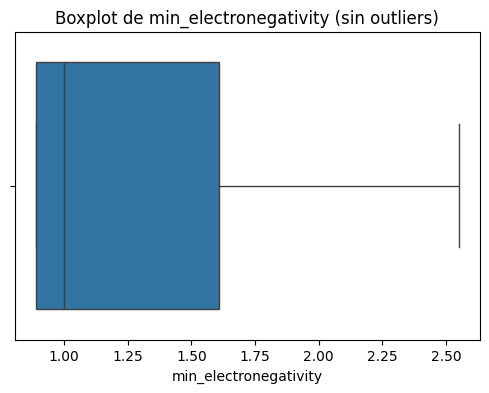

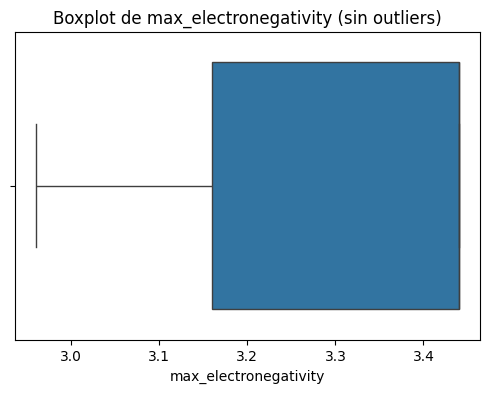

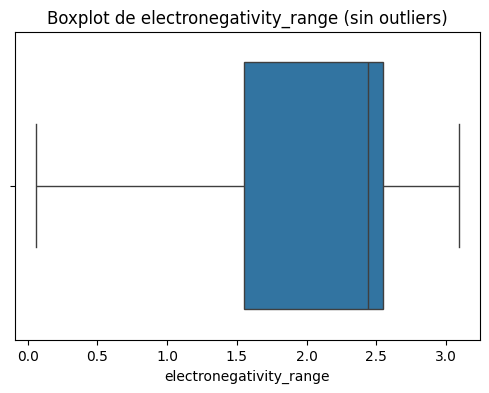

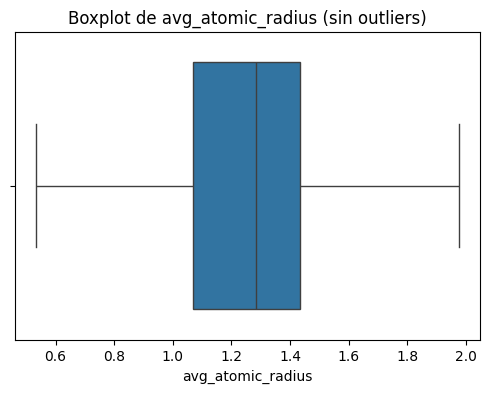

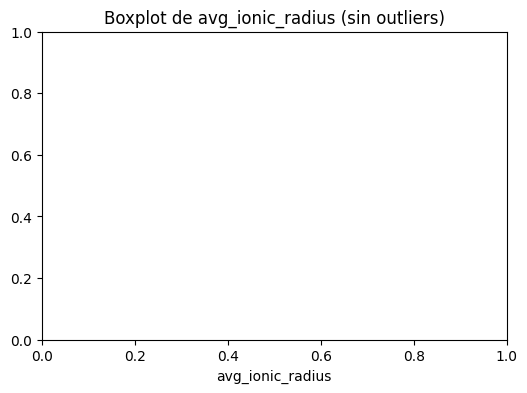

In [13]:
# ==============================
# Gráfico Boxplot sin outliers 
# ==============================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Selección estricta de columnas numéricas
numeric_cols = df1.select_dtypes(include=[float, int]).columns.tolist()
print("Columnas numéricas detectadas:", numeric_cols)

# Loop para boxplots
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col].dropna(), showfliers=False)  # <- paso Serie limpia
    plt.title(f"Boxplot de {col} (sin outliers)")
    plt.xlabel(col)
    plt.show()


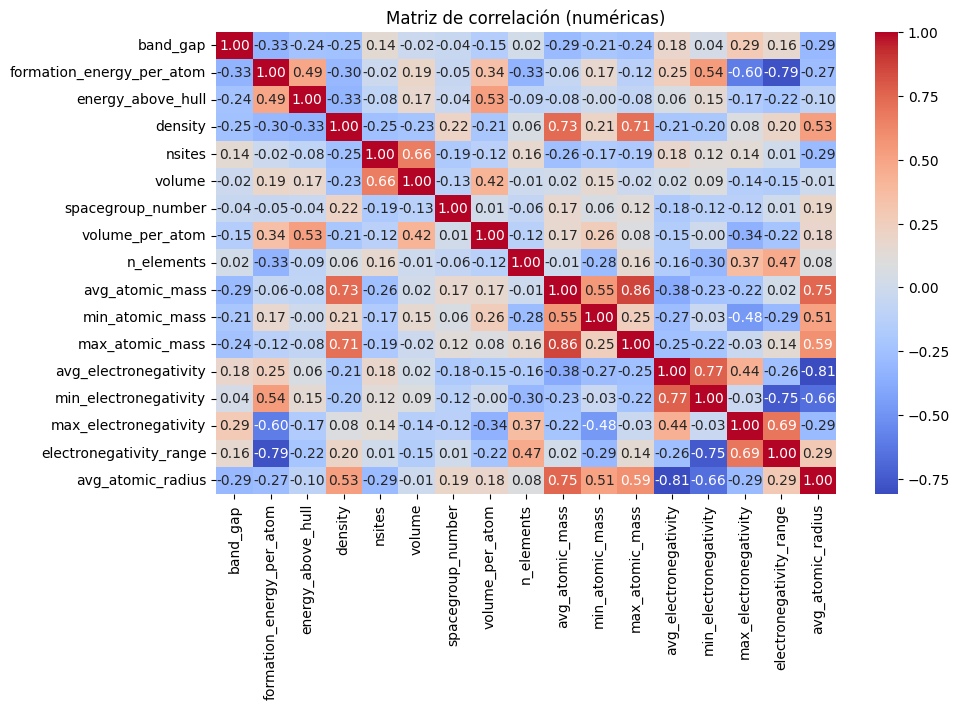

In [14]:
#Cosas de codigo que no entiendo pero me da igual
#Matriz de correlacion


numeric_cols = df1.select_dtypes(include=["float64", "int64"]).columns.tolist()
if "avg_ionic_radius" in numeric_cols:
    numeric_cols.remove("avg_ionic_radius")
corr = df1[numeric_cols].corr()



plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación (numéricas)")
plt.show()


In [23]:
# Calcular la matriz de correlación
numeric_cols = df1.select_dtypes(include=["float64", "int64"]).columns.tolist()
if "avg_ionic_radius" in numeric_cols:
    numeric_cols.remove("avg_ionic_radius")
corr = df1[numeric_cols].corr()


# Filtrar correlaciones fuertes (>|0.5|)
strong_corr = []

for col in corr.columns:
    for row in corr.index:
        if col != row:  # evitar la diagonal = 1
            if abs(corr.loc[row, col]) > 0.5:
                strong_corr.append((row, col, corr.loc[row, col]))

# Convertir a DataFrame para verlo mejor
strong_corr_df = pd.DataFrame(strong_corr, columns=["Var1", "Var2", "Correlación"])

# Eliminar duplicados (porque corr A-B = corr B-A)
strong_corr_df = strong_corr_df.sort_values(by="Correlación", ascending=False).drop_duplicates(subset=["Correlación"])

print("Correlaciones fuertes (>|0.5|):")
display(strong_corr_df)

Correlaciones fuertes (>|0.5|):


,Var1,Var2,Correlación
12,max_atomic_mass,avg_atomic_mass,0.861490
22,avg_electronegativity,min_electronegativity,0.767896
31,avg_atomic_mass,avg_atomic_radius,0.752834
4,avg_atomic_mass,density,0.732493
5,max_atomic_mass,density,0.714944
26,electronegativity_range,max_electronegativity,0.690161
7,volume,nsites,0.663949
18,avg_atomic_radius,max_atomic_mass,0.589808
11,min_atomic_mass,avg_atomic_mass,0.552382
21,formation_energy_per_atom,min_electronegativity,0.536757


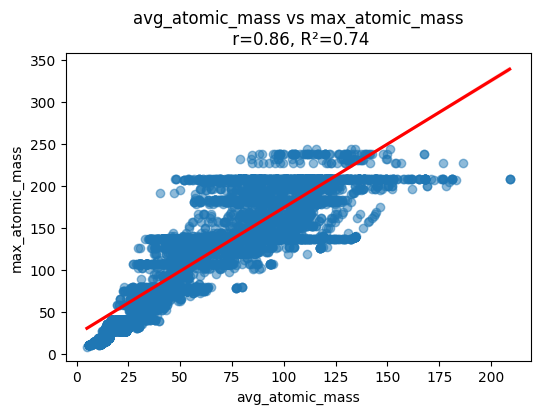

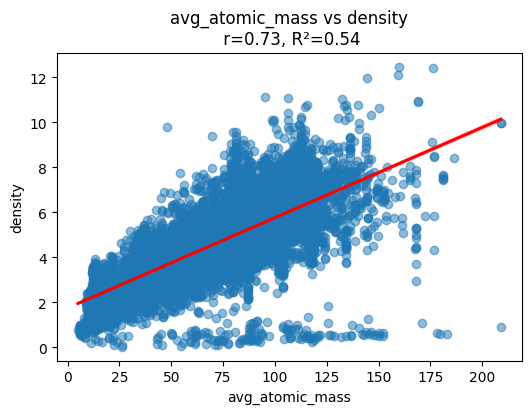

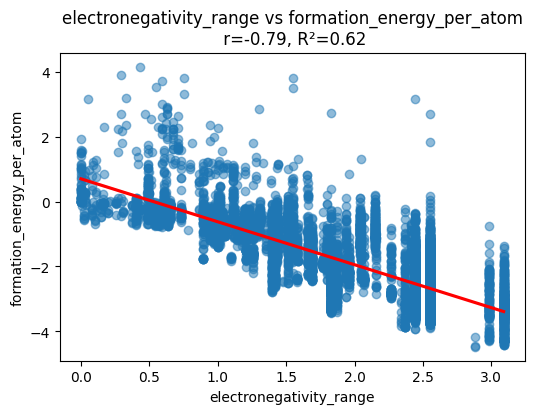

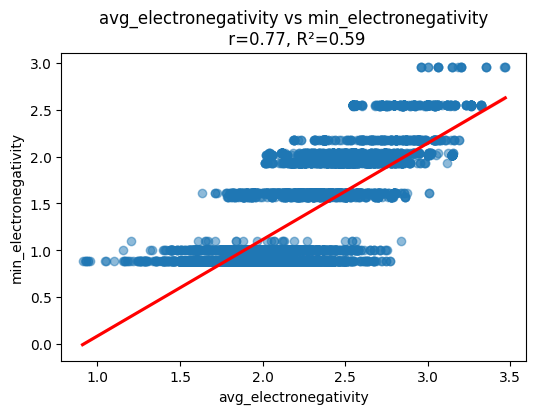

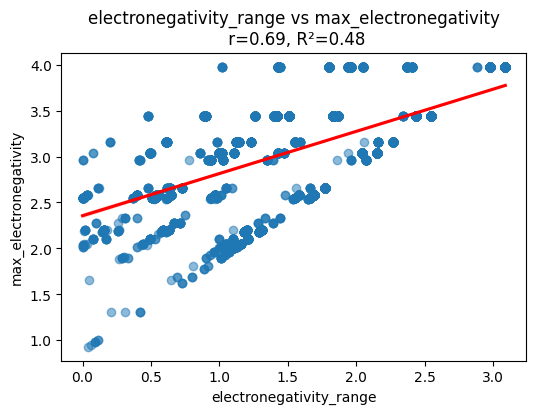

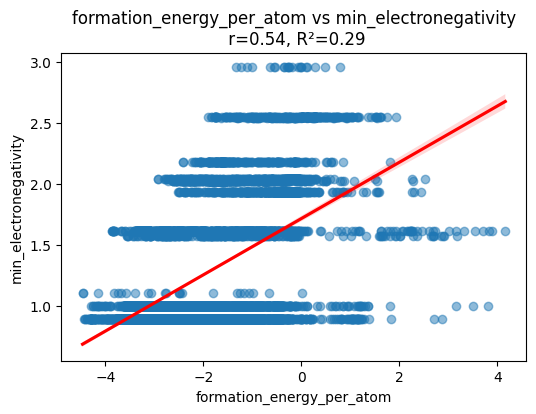

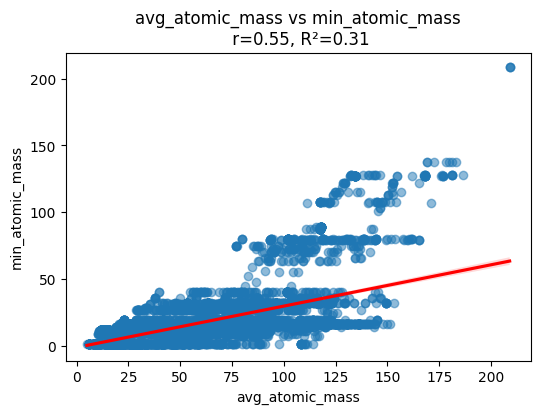

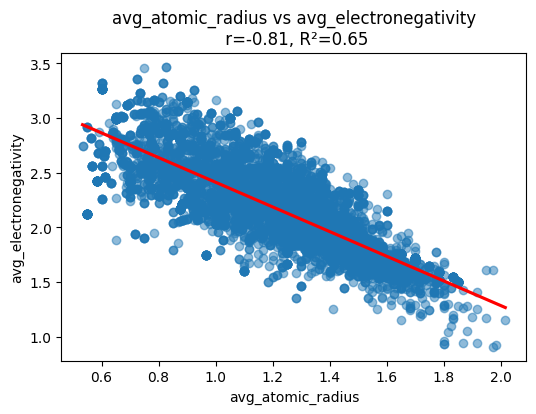

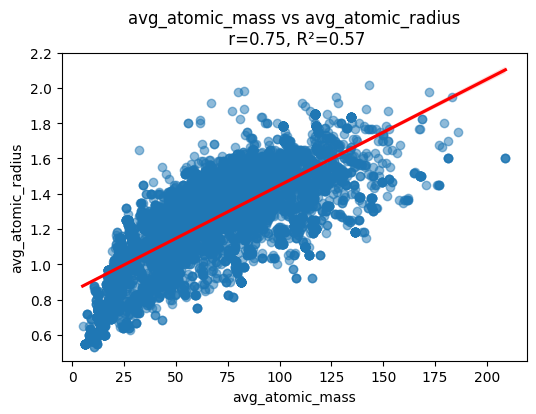

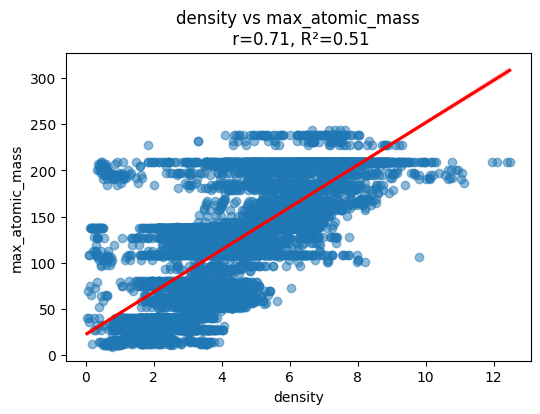

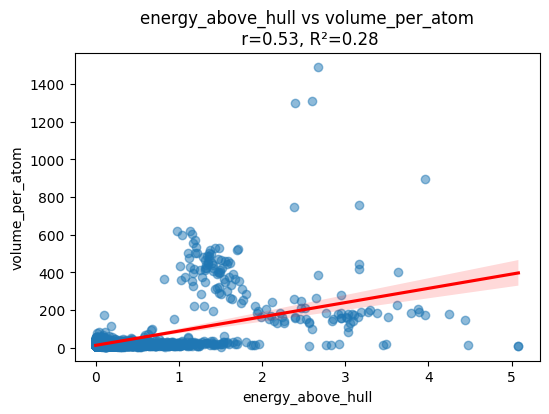

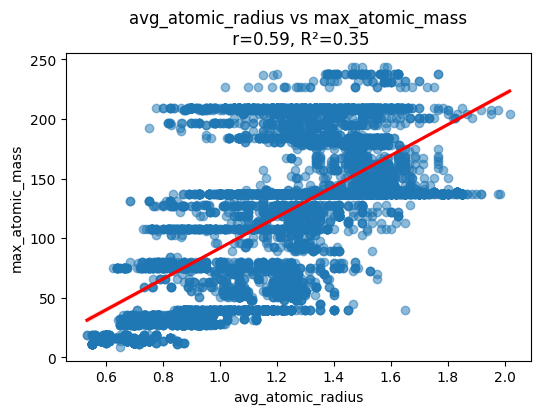

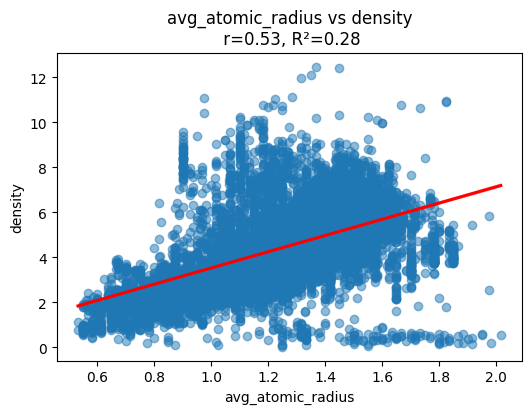

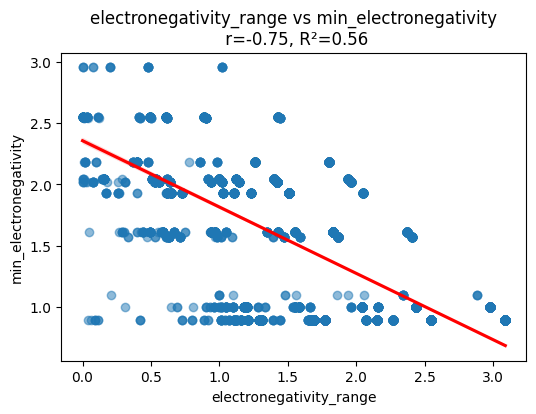

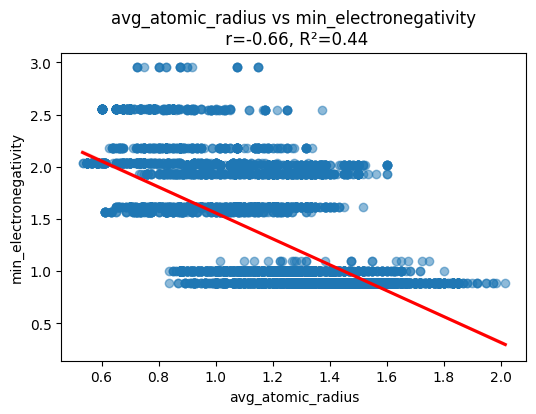

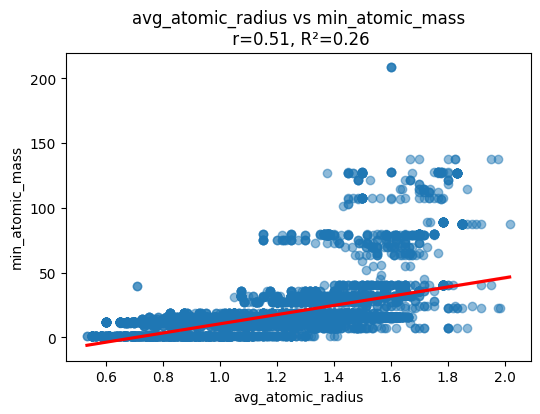

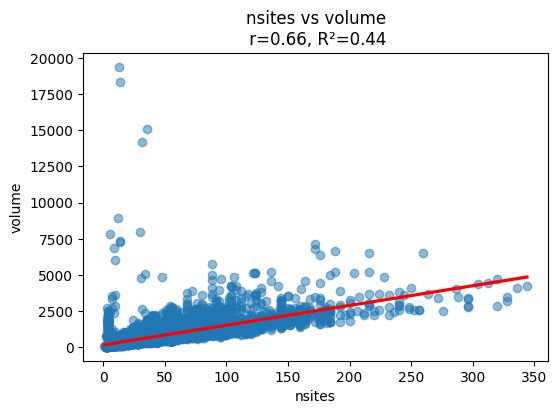

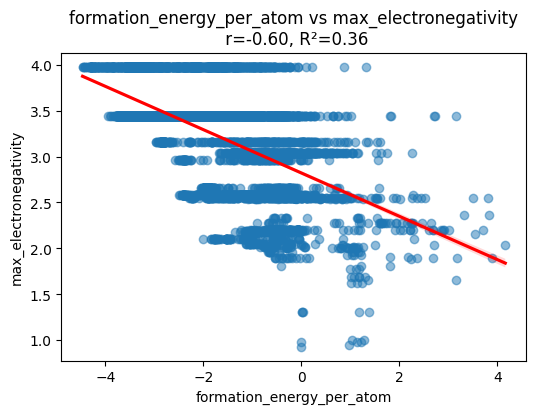

In [ ]:
#Gráfico de dispersion con linea de tendencia y R²


import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 1. Calcular la matriz de correlación de todas las columnas numéricas
numeric_cols = df1.select_dtypes(include=["float64", "int64"]).columns.tolist()
if "avg_ionic_radius" in numeric_cols:
    numeric_cols.remove("avg_ionic_radius")
corr = df1[numeric_cols].corr()

# 2. Buscar pares de columnas con correlación fuerte (>0.5 o <-0.5)
pairs = []
for col in corr.columns:
    for row in corr.index:
        if col != row and abs(corr.loc[row, col]) > 0.5:
            # Guardamos el par como tupla ordenada para evitar duplicados (A-B = B-A)
            pair = tuple(sorted((row, col)))
            pairs.append(pair)

# 3. Eliminar duplicados de la lista de pares
pairs = list(set(pairs))

# 4. Dibujar scatterplots con línea de tendencia y calcular r y R²
for a, b in pairs:
    if a in df1.columns and b in df1.columns:
        # --- Seleccionar solo las filas sin NaN en ambas columnas ---
        valid = df1[[a, b]].dropna()

        # --- Evitar error si después de limpiar NaN quedan muy pocos datos ---
        if len(valid) > 1:
            # Calcular correlación de Pearson y su p-valor
            r, p = pearsonr(valid[a], valid[b])
            # Calcular el coeficiente de determinación (R²)
            r2 = r**2

            # --- Crear gráfico de dispersión con línea de regresión ---
            plt.figure(figsize=(6,4))
            sns.regplot(
                x=valid[a], y=valid[b],
                scatter_kws={'alpha':0.5},   # transparencia en puntos
                line_kws={'color':'red'}     # línea de tendencia roja
            )

            # Título con r y R²
            plt.title(f"{a} vs {b}\n r={r:.2f}, R²={r2:.2f}")
            plt.xlabel(a)
            plt.ylabel(b)
            plt.show()

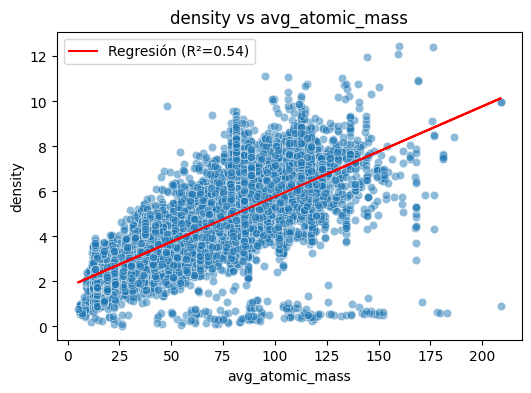

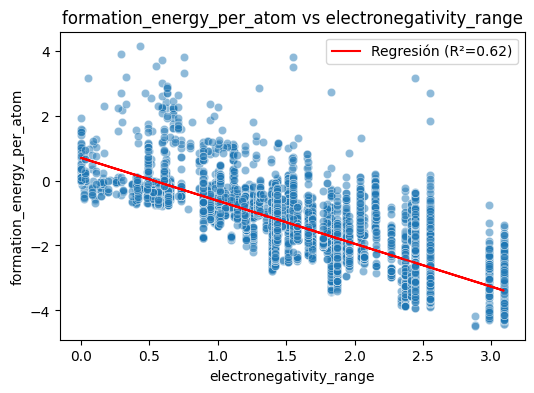

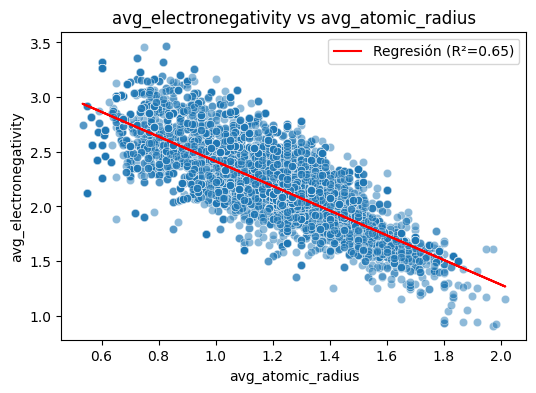

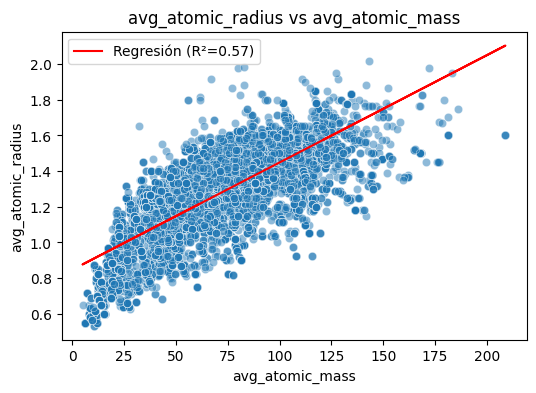

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Lista de pares a graficar
pairs = [
    ("avg_atomic_mass", "density"),
    ("electronegativity_range", "formation_energy_per_atom"),
    ("avg_atomic_radius", "avg_electronegativity"),
    ("avg_atomic_mass", "avg_atomic_radius")
]

# Función para scatter + regresión + R²
def scatter_with_regression(df, x_col, y_col):
    # Eliminar nulos
    data = df[[x_col, y_col]].dropna()

    X = data[[x_col]].values.reshape(-1, 1)
    y = data[y_col].values

    # Ajuste lineal
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    # Calcular R²
    r2 = r2_score(y, y_pred)

    # Dibujar gráfico
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=x_col, y=y_col, data=data, alpha=0.5)
    plt.plot(data[x_col], y_pred, color="red", label=f"Regresión (R²={r2:.2f})")
    plt.title(f"{y_col} vs {x_col}")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend()
    plt.show()

# Generar gráficos para cada par
for x, y in pairs:
    scatter_with_regression(df, x, y)